In [1]:
import xarray as xr
from xcube.core.gridmapping import GridMapping
from xcube.core.resampling import resample_in_space

In [2]:
def imshow(var):
    var.plot.imshow(figsize=(16,16), vmax=0.25, cmap='gray')

In [3]:
%%time
source_ds = xr.open_zarr('../inputdata/S3-OLCI-L2A.zarr.zip')
source_ds

Wall time: 20 ms


<xarray.Dataset>
Dimensions:        (x: 1189, y: 1890)
Coordinates:
    lat            (y, x) float64 dask.array<chunksize=(512, 512), meta=np.ndarray>
    lon            (y, x) float64 dask.array<chunksize=(512, 512), meta=np.ndarray>
Dimensions without coordinates: x, y
Data variables:
    quality_flags  (y, x) uint32 dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_3         (y, x) float32 dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_6         (y, x) float32 dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_8         (y, x) float32 dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

Wall time: 552 ms


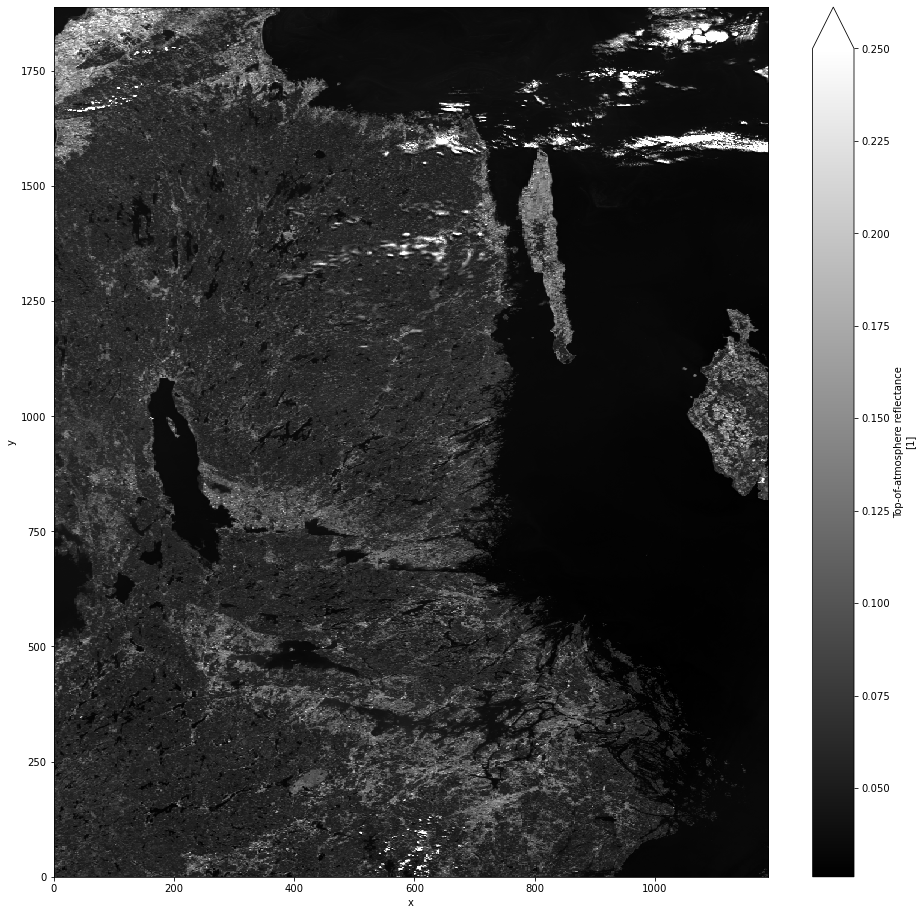

In [4]:
%%time
imshow(source_ds.rtoa_8)

In [5]:
source_gm = GridMapping.from_dataset(source_ds)
source_gm

class: **Coords2DGridMapping**
* is_regular: False
* is_j_axis_up: _unknown_
* is_lon_360: False
* crs: epsg:4326
* xy_res: (0.0025, 0.0025)  _estimated_
* xy_bbox: (12.693050999999999, 55.19893, 20.006134, 60.63943999999999)
* ij_bbox: (0, 0, 1189, 1890)
* xy_dim_names: ('x', 'y')
* xy_var_names: ('lon', 'lat')
* size: (1189, 1890)
* tile_size: (512, 512)

In [6]:
target_gm = source_gm.to_regular(tile_size=512)
target_gm

class: **RegularGridMapping**
* is_regular: True
* is_j_axis_up: False
* is_lon_360: False
* crs: epsg:4326
* xy_res: (0.0025, 0.0025)
* xy_bbox: (12.693050999999999, 55.19893, 20.008051, 60.64143)
* ij_bbox: (0, 0, 2926, 2177)
* xy_dim_names: ('lon', 'lat')
* xy_var_names: ('lon', 'lat')
* size: (2926, 2177)
* tile_size: (512, 512)

In [7]:
%%time
target_ds = resample_in_space(source_ds, source_gm=source_gm, target_gm=target_gm)
target_ds

Wall time: 1.01 s


<xarray.Dataset>
Dimensions:        (bnds: 2, lat: 2177, lon: 2926)
Coordinates:
  * lat            (lat) float64 60.64 60.64 60.64 60.63 ... 55.21 55.2 55.2
  * lon            (lon) float64 12.69 12.7 12.7 12.7 ... 20.0 20.0 20.0 20.01
    lon_bnds       (lon, bnds) float64 12.69 12.7 12.7 ... 20.01 20.01 20.01
    lat_bnds       (lat, bnds) float64 60.64 60.64 60.64 ... 55.2 55.2 55.2
Dimensions without coordinates: bnds
Data variables:
    quality_flags  (lat, lon) uint32 dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_3         (lat, lon) float32 dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_6         (lat, lon) float32 dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_8         (lat, lon) float32 dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

Wall time: 2.42 s


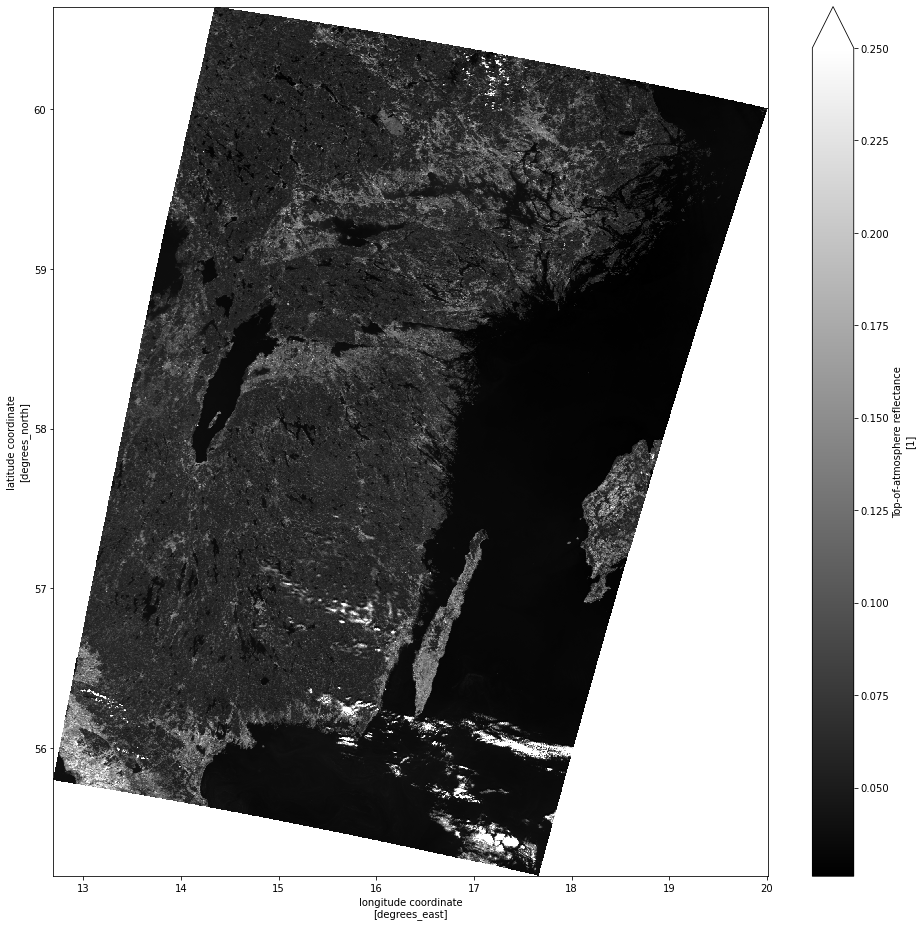

In [8]:
%%time
imshow(target_ds.rtoa_8)